In [1]:
import pandas as pd # for DataFrame
import numpy as np
import matplotlib.pyplot as plt # for Data Vidualize 
from sklearn.preprocessing import LabelEncoder # for Label Encoding
from sklearn.model_selection import train_test_split # for split data traing and testing 
from sklearn.metrics import mean_absolute_error,mean_squared_error # for calculate MAE/MSE
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor # for KNN Classifier and Regression
from pandas.core.dtypes.common import is_numeric_dtype #for check column data type 
from sklearn.linear_model import LinearRegression # for Linear Regression
from sklearn.tree import DecisionTreeClassifier # for Decision Tree Classifier
# for Calculate Classification on Accuracy,Report,Cunfusion Matrix and ROC ,AUC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve 

In [2]:
df1=pd.read_csv('weight-height.csv') # for read CSV Data

In [3]:
df1.head() # print fitst 5 row Data 

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df1.isnull().sum() # for check How many null value each column

Gender    0
Height    0
Weight    0
dtype: int64

In [5]:
df1.describe() # calculate Count , Mean, Standart Divation, Min, First Quartile, Second Quartile, Third Quartile

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


In [6]:
df1.info() # for show information each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


# Now Want To Encoding on Gender Column

In [7]:
le=LabelEncoder() # for create a object On Label Encoder

In [8]:
for col in df1.columns:
    if is_numeric_dtype(df1[col]):
        continue
    df1[col]=le.fit_transform(df1[col])
    
# Here we use Label encoding using for loop. first check column data isNumeric or Not if Not Numeric then do Operation for Encoding

In [9]:
df1.head() 

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [10]:
df2=df1.copy() # copy Df1 All Data On Df2 different Location

In [11]:
print(id(df1))
print(id(df2)) # print Df1 and Df2 ID 

2309296921264
2309296930432


# Split Data for Training and Testing

In [12]:
x=df1.drop('Weight',axis=1) # here Drop Weight column and save Data On Variable X

In [13]:
y=df1['Weight'] # Store Weight Data On Y

In [14]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [15]:
pd.DataFrame(y.head())

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [16]:
xTrain,xTest,yTrain,yTest=train_test_split(x,y,random_state=42,test_size=.30) # for Split data 

In [17]:
xTrain.head() 

,Gender,Height
553,1,67.594031
1397,1,71.601697
7934,0,62.625985
8367,0,66.136131
3320,1,71.843308


In [18]:
pd.DataFrame(yTrain.head())

,Weight
553,186.751417
1397,211.031652
7934,143.768451
8367,151.814648
3320,196.505814


# Compare With Linear Regression and kNN Regression

In [19]:
objectLinearRegression=LinearRegression() # Create a Object for Linear Regression
objectKnnRegression=KNeighborsRegressor() # Create a Object for Knn Regression

In [20]:
objectLinearRegression.fit(xTrain,yTrain) # Fit Trainig data On Linear Regression
objectKnnRegression.fit(xTrain,yTrain) # Fit Trainig data On KNN Regression

KNeighborsRegressor()

### Score On Linear and KNN 

In [21]:
objectLinearRegression.score(xTest,yTest) # Score on Linear

0.9059112424422658

In [22]:
objectKnnRegression.score(xTest,yTest) # Score on KNN

0.8821086423439015

In [23]:
storeScoreLinearRegression=objectLinearRegression.score(xTest,yTest) # For Store Score Data On Variable

In [24]:
storeScoreKnnRegression=objectKnnRegression.score(xTest,yTest) # For Store Score Data On Variable

### Predictted Output Data View

In [25]:
objectLinearRegression.predict(xTest) # for Linear Predicted Data (Y)

array([142.44868114, 186.0517281 , 198.42283706, ..., 102.94080643,
       190.83713617, 143.34786753])

In [26]:
objectKnnRegression.predict(xTest) # for KNN Predicted Data (Y)

array([142.1445657 , 181.38276924, 187.07075266, ..., 101.79654426,
       192.43702356, 145.3632227 ])

In [27]:
np.array(yTest) # Actual (Y)

array([149.6683685 , 197.6422437 , 178.5511913 , ...,  98.86925293,
       190.9334005 , 123.8684292 ])

### Calculate Error

In [28]:
predictedLinearRegression=objectLinearRegression.predict(xTest) # Predicted Data Store On Variable
predictedKnnRegression=objectKnnRegression.predict(xTest)

In [29]:
mean_squared_error(yTest,predictedLinearRegression) # MSE for Linear Regression

96.83734437830613

In [30]:
mean_squared_error(yTest,predictedKnnRegression) # MSE for KNN Regression

121.33528273624482

In [31]:
mean_absolute_error(yTest,predictedLinearRegression) # MAE for Linear Regression

7.870097130738321

In [32]:
mean_absolute_error(yTest,predictedKnnRegression) # MAE for KNN Regression

8.809865583894819

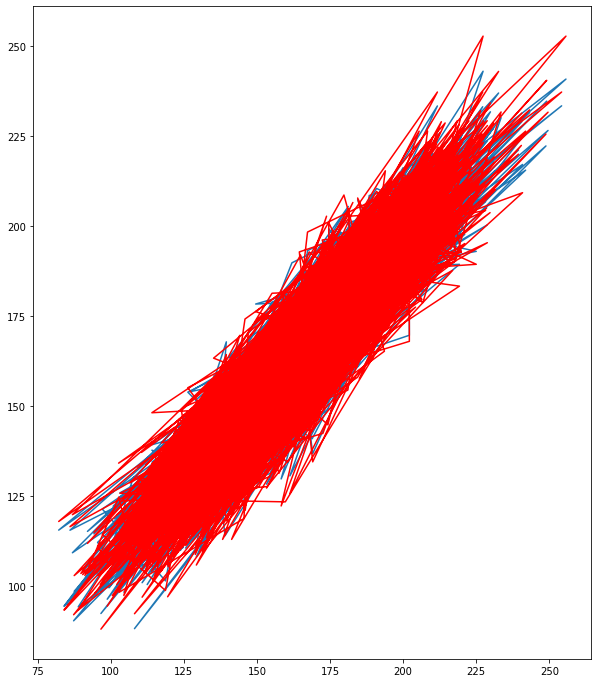

In [33]:
# for Plot 
plt.figure(figsize=(10,12))
plt.plot(yTest,predictedLinearRegression) # Plot On Linear Base
plt.plot(yTest,predictedKnnRegression,color='red') # Plot on KNN Base

# Compare With Confusion Matrix and kNN Classification

In [34]:
df2.head() # for Print first 5 row data on DF2

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [35]:
x=df2.drop('Gender',axis=1) # for Drop Gender Column and store data on Variable X

In [36]:
y=df2['Gender'] # store Gender Column on Variable Gender

In [37]:
xTrain,xTest,yTrain,yTest=train_test_split(x,y,random_state=42,test_size=.30) # for Split data 

In [38]:
objectDecisionClassifier=DecisionTreeClassifier() # for Create a Object for Confusion Matrix Classifier
objectKnnClassifier=KNeighborsClassifier() # for create a Object for KNN Classifier

In [39]:
objectDecisionClassifier.fit(xTrain,yTrain) # Fit Trainig data On Confusion Matrix Classifier
objectKnnClassifier.fit(xTrain,yTrain) # Fit Trainig data On KNN Classifier

KNeighborsClassifier()

### Score 

In [40]:
objectDecisionClassifier.score(xTest,yTest) # Score on Confusion Matrix

0.8893650175301909

In [41]:
objectKnnClassifier.score(xTest,yTest) # Score on Knn Classifier

0.9131281651733542

In [42]:
storeScoreDecisionClassifier=objectDecisionClassifier.score(xTest,yTest) # For Store Score Data On Variable

In [43]:
storeScoreKNNClassifier=objectKnnClassifier.score(xTest,yTest) # For Store Score Data On Variable

### Predicted Output Data View

In [44]:
objectDecisionClassifier.predict(xTest) # Predicted All Data for  Confusion Matrix

array([0, 1, 1, ..., 0, 1, 0])

In [45]:
objectKnnClassifier.predict(xTest) # Predicted All Data for Knn Classifier

array([0, 1, 1, ..., 0, 1, 0])

In [46]:
np.array(yTest) # Actual Y

array([0, 1, 1, ..., 0, 1, 0])

### Classification Report

In [47]:
predictedConfusionMatrix=objectDecisionClassifier.predict(xTest) # for Store Confusion Matrix  Predicted Data On Variable
predictedKnnClassification=objectKnnClassifier.predict(xTest) # for Store  Knn Classifier  Predicted Data On Variable

In [48]:
print(classification_report(yTest,predictedConfusionMatrix)) # for Confusion Matrix Report

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1066
           1       0.90      0.92      0.91      1501

    accuracy                           0.89      2567
   macro avg       0.89      0.88      0.89      2567
weighted avg       0.89      0.89      0.89      2567



In [49]:
print(classification_report(yTest,predictedKnnClassification)) # for Knn Classifier Report

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1066
           1       0.92      0.93      0.93      1501

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567



### ROC Curve

C:\Users\Youtech BD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


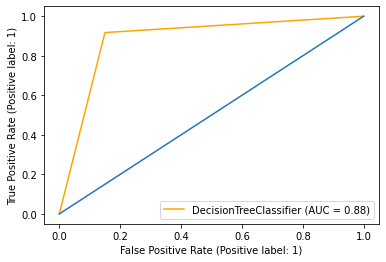

In [50]:
plot_roc_curve(objectDecisionClassifier,xTest,yTest,color='orange') # ROC Curve On  Confusion Matrix
plt.plot([0,1],[0,1])

C:\Users\Youtech BD\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


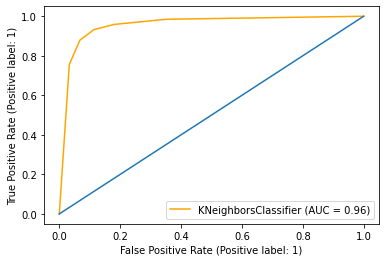

In [51]:
plot_roc_curve(objectKnnClassifier,xTest,yTest,color='orange') # ROC Curve On Knn Classifier
plt.plot([0,1],[0,1])

# Conculation:

In [52]:
print("For Regression. \n")
print("Linear Regression Score:",storeScoreLinearRegression)
print("KNN Regression Score:",storeScoreKnnRegression)

print("\n\nFor Clasification. \n")
print("Confusion Matrix Score:",storeScoreDecisionClassifier)
print("KNN Classifier Score:",storeScoreKNNClassifier)

For Regression. 

Linear Regression Score: 0.9059112424422658
KNN Regression Score: 0.8821086423439015


For Clasification. 

Confusion Matrix Score: 0.8893650175301909
KNN Classifier Score: 0.9131281651733542


## Here we can Write for Regression Linear Regression is Better for this Dataset
## and for Clasification KNN Classification is Better for this Dataset. 

# Thanks for Watching